## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/AI/Project/6th/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd

In [11]:
labels = pd.read_csv('./labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [12]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

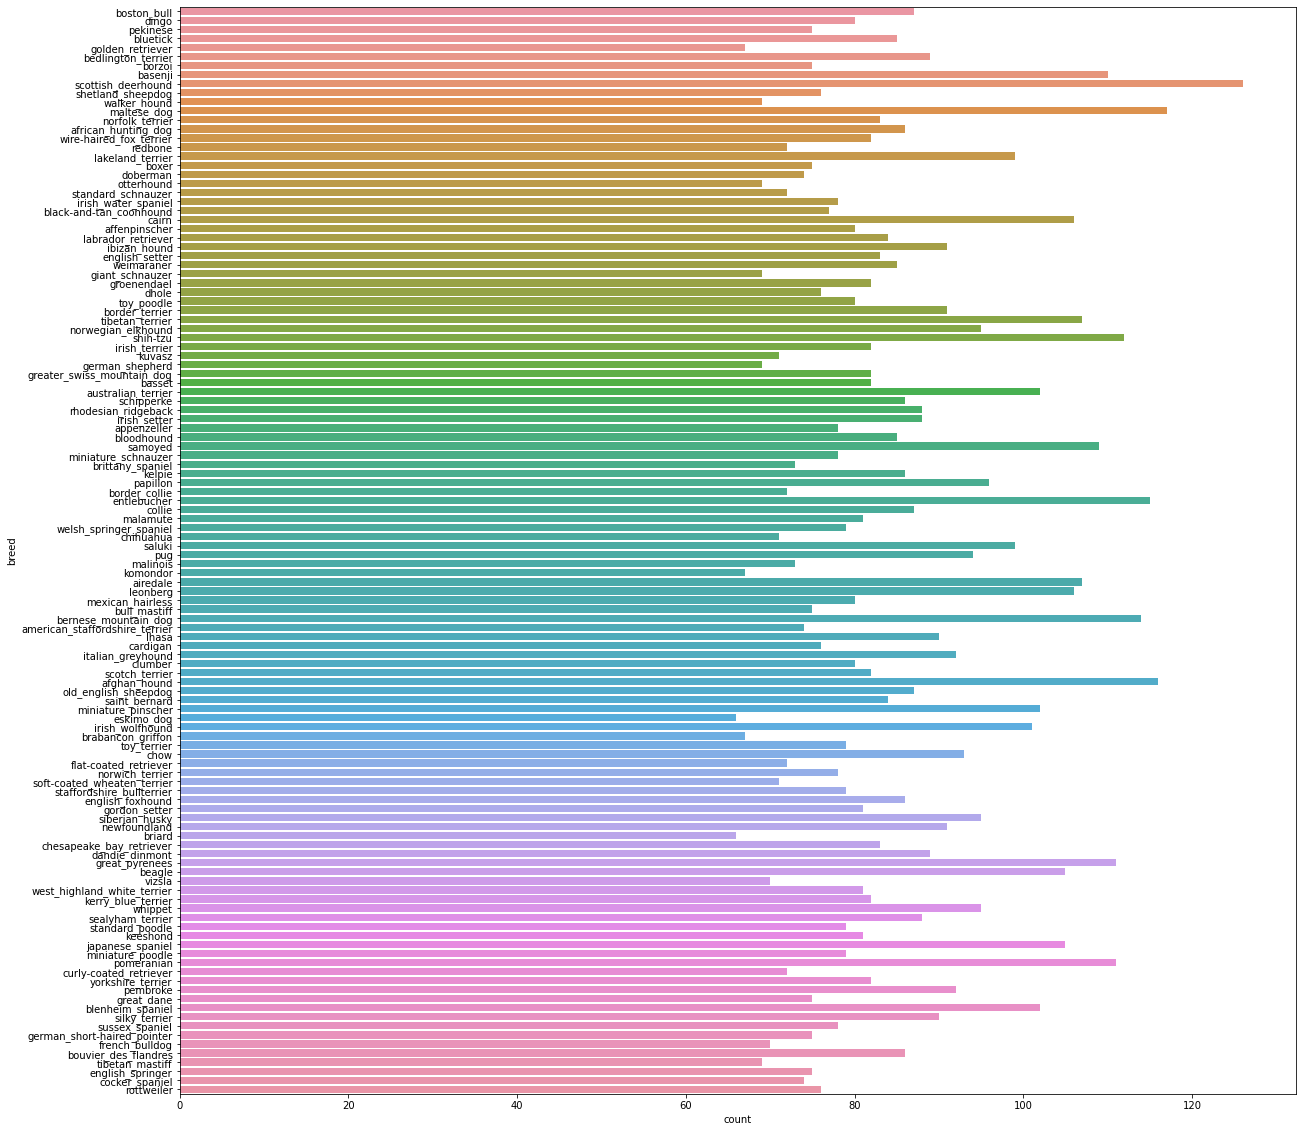

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.countplot(y = labels['breed'])

### Get one-hot encodings of labels

In [0]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [0]:
enc = LabelEncoder()
lenc = enc.fit_transform(labels['breed'])
ohe = to_categorical(lenc,num_classes=labels['breed'].nunique())

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
import cv2

In [15]:
x_train = []
label = []

for img,breeds in labels.values:
  train_feat = cv2.imread('./train/{}.jpg'.format(img),1)
  train_feat_resz = cv2.resize(train_feat,(128,128))
  x_train.append(train_feat_resz)
  label.append(breeds)

KeyboardInterrupt: ignored

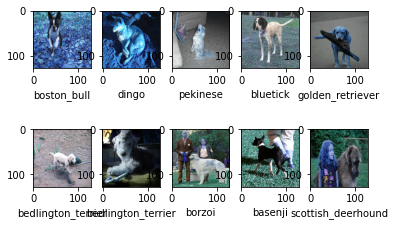

In [17]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(label[i])
  i += 1

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
import numpy as np
x_train_arr = np.array(x_train)
x_train_arr_nrm = x_train_arr/255#x_train_arr_nrm = x_train_arr/255

In [19]:
print("Shape of extracted x_train==>",x_train[0].shape)
print("Shape of arrayed x_train==>",x_train_arr.shape)

Shape of extracted x_train==> (128, 128, 3)
Shape of arrayed x_train==> (10222, 128, 128, 3)


In [20]:
print("The x_train before normalizing==>\n",x_train_arr[0])
print("The x_train after normalizing==>\n",x_train_arr_nrm[0])

The x_train before normalizing==>
 [[[ 69 116 173]
  [ 38  91 136]
  [102 166 204]
  ...
  [130 204 237]
  [ 85 193 220]
  [ 59 138 170]]

 [[ 42  77 118]
  [142 180 216]
  [119 162 197]
  ...
  [ 80 152 194]
  [101 183 218]
  [ 74 177 212]]

 [[ 65 107 151]
  [ 57 103 147]
  [ 66 107 153]
  ...
  [ 37 121 172]
  [ 73 145 183]
  [ 64 168 207]]

 ...

 [[ 77 119 190]
  [ 66 121 186]
  [ 66 122 183]
  ...
  [ 70  91 159]
  [ 59  89 154]
  [ 91 132 184]]

 [[ 65 118 185]
  [ 72 124 190]
  [ 74 125 187]
  ...
  [ 54  63 132]
  [ 74 116 169]
  [121 169 223]]

 [[ 63 116 183]
  [ 73 125 191]
  [ 76 127 190]
  ...
  [ 50  51 127]
  [ 31  62 128]
  [ 90 145 198]]]
The x_train after normalizing==>
 [[[0.27058824 0.45490196 0.67843137]
  [0.14901961 0.35686275 0.53333333]
  [0.4        0.65098039 0.8       ]
  ...
  [0.50980392 0.8        0.92941176]
  [0.33333333 0.75686275 0.8627451 ]
  [0.23137255 0.54117647 0.66666667]]

 [[0.16470588 0.30196078 0.4627451 ]
  [0.55686275 0.70588235 0.8470588

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train_arr_nrm,ohe,test_size =0.2)

In [25]:
print("Shape of x_train is==>",x_train.shape)
print("Shape of x_val is==>",x_val.shape)
print("Shape of y_train is==>",y_train.shape)
print("Shape of y_val is==>",y_val.shape)

Shape of x_train is==> (8177, 128, 128, 3)
Shape of x_val is==> (2045, 128, 128, 3)
Shape of y_train is==> (8177, 120)
Shape of y_val is==> (2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [26]:
samples = pd.read_csv('./sample_submission.csv')
samples.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
test_img = samples.id

Run the below code to load the test image files in x_test_feature

In [0]:
img_rows = 128
img_cols = 128
x_test_feature = []
i = 0 # initialisation
for f in test_img.values: # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_arr = np.array(x_test_feature)
x_test_arr_nrm = x_test_arr/255

In [30]:
print("The x_test before normalizing==>\n",x_test_arr[0])
print("The x_train after normalizing==>\n",x_test_arr_nrm[0])

The x_test before normalizing==>
 [[104  98  93 ...  45  99  87]
 [ 83  71 105 ...  75  73  93]
 [ 72 105 115 ...  75  54 128]
 ...
 [ 79  40  86 ...  35  36  21]
 [ 39 117 200 ...  25  37  50]
 [ 32  46  16 ...   7  49  37]]
The x_train after normalizing==>
 [[0.40784314 0.38431373 0.36470588 ... 0.17647059 0.38823529 0.34117647]
 [0.3254902  0.27843137 0.41176471 ... 0.29411765 0.28627451 0.36470588]
 [0.28235294 0.41176471 0.45098039 ... 0.29411765 0.21176471 0.50196078]
 ...
 [0.30980392 0.15686275 0.3372549  ... 0.1372549  0.14117647 0.08235294]
 [0.15294118 0.45882353 0.78431373 ... 0.09803922 0.14509804 0.19607843]
 [0.1254902  0.18039216 0.0627451  ... 0.02745098 0.19215686 0.14509804]]


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
model = Sequential()
model.add(Conv2D(64,kernel_size=5,activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(120,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               29491456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [0]:
fastop = EarlyStopping(monitor='val_loss',patience=4)

### Use batch_size = 128 and epochs = 10 and execute the model

Epoch 1/10
64/64 [==============================] - 5s 85ms/step - loss: 4.9010 - accuracy: 0.0104 - val_loss: 4.7861 - val_accuracy: 0.0161
Epoch 2/10
64/64 [==============================] - 5s 77ms/step - loss: 4.7243 - accuracy: 0.0249 - val_loss: 4.6545 - val_accuracy: 0.0264
Epoch 3/10
64/64 [==============================] - 5s 77ms/step - loss: 4.3325 - accuracy: 0.0692 - val_loss: 4.5097 - val_accuracy: 0.0416
Epoch 4/10
64/64 [==============================] - 5s 77ms/step - loss: 3.4532 - accuracy: 0.2105 - val_loss: 4.7720 - val_accuracy: 0.0533
Epoch 5/10
64/64 [==============================] - 5s 76ms/step - loss: 2.1753 - accuracy: 0.4758 - val_loss: 5.6430 - val_accuracy: 0.0430
Epoch 6/10
64/64 [==============================] - 5s 76ms/step - loss: 1.1002 - accuracy: 0.7274 - val_loss: 6.8925 - val_accuracy: 0.0489
Epoch 7/10
64/64 [==============================] - 5s 76ms/step - loss: 0.5406 - accuracy: 0.8700 - val_loss: 8.4664 - val_accuracy: 0.0484


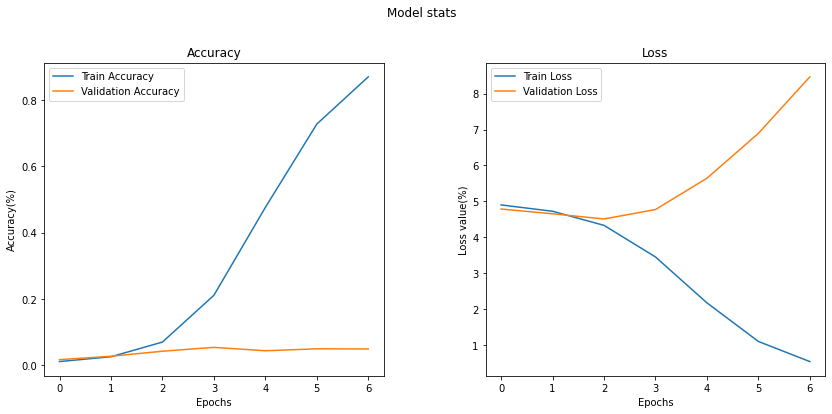

In [36]:
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,batch_size=128,callbacks=[fastop])
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history.history['accuracy'],label='Train Accuracy')
ax1.plot(history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy(%)')
ax1.legend(loc='best')

ax2.plot(history.history['loss'],label='Train Loss')
ax2.plot(history.history['val_loss'],label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss value(%)')
ax2.legend(loc='best')

In [37]:
loss,accu = model.evaluate(x_train,y_train)
loss1,accu1 = model.evaluate(x_val,y_val)
print("The training loss was about {}% wherein the training accuracy accounted up to {}% but,\n the validation loss goes upto {}% & validation accuracy is {}%".format(loss*100,accu*100,loss1*100,accu1*100))

64/64 [==============================] - 1s 9ms/step - loss: 8.4673 - accuracy: 0.0484
The training loss was about 14.354300498962402% wherein the training accuracy accounted up to 98.1166660785675% but,
 the validation loss goes upto 846.7307090759277% & validation accuracy is 4.841075837612152%


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rotation_range=45,horizontal_flip=True,width_shift_range=0.2,height_shift_range=0.2,rescale = 1./255,shear_range=0.2,zoom_range=0.2,fill_mode='nearest')

In [0]:
val_datagen = ImageDataGenerator(rescale=1./255)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(x_train,y_train,batch_size=50)
val_generator = val_datagen.flow(x_val,y_val,batch_size=50)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

Epoch 1/10
100/100 [==============================] - 18s 184ms/step - loss: 4.9150 - accuracy: 0.0108 - val_loss: 4.7862 - val_accuracy: 0.0113
Epoch 2/10
100/100 [==============================] - 18s 179ms/step - loss: 4.7846 - accuracy: 0.0117 - val_loss: 4.7850 - val_accuracy: 0.0106
Epoch 3/10
100/100 [==============================] - 18s 181ms/step - loss: 4.7826 - accuracy: 0.0140 - val_loss: 4.7852 - val_accuracy: 0.0121
Epoch 4/10
100/100 [==============================] - 18s 179ms/step - loss: 4.7821 - accuracy: 0.0121 - val_loss: 4.7852 - val_accuracy: 0.0106
Epoch 5/10
100/100 [==============================] - 18s 180ms/step - loss: 4.7812 - accuracy: 0.0119 - val_loss: 4.7837 - val_accuracy: 0.0110
Epoch 6/10
100/100 [==============================] - 18s 177ms/step - loss: 4.7792 - accuracy: 0.0128 - val_loss: 4.7851 - val_accuracy: 0.0116
Epoch 7/10
100/100 [==============================] - 18s 176ms/step - loss: 4.7795 - accuracy: 0.0139 - val_loss: 4.7845 - val_ac

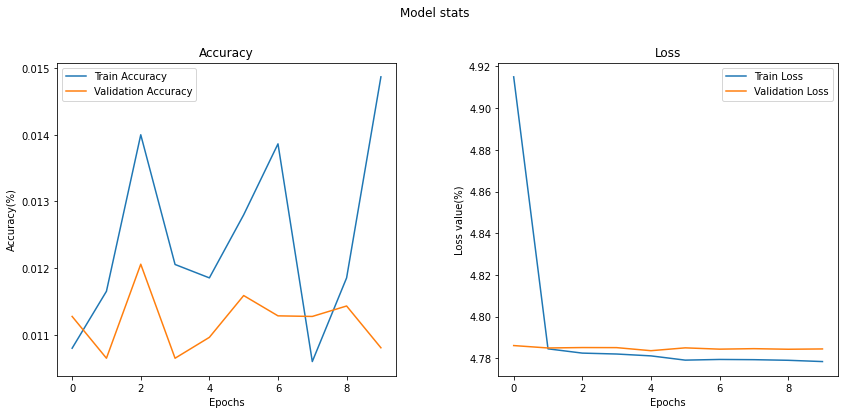

In [42]:
history0 = model.fit(train_generator,validation_data=val_generator,epochs=10,verbose=1,steps_per_epoch=100,validation_steps = 128)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history0.history['accuracy'],label='Train Accuracy')
ax1.plot(history0.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy(%)')
ax1.legend(loc='best')

ax2.plot(history0.history['loss'],label='Train Loss')
ax2.plot(history0.history['val_loss'],label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss value(%)')
ax2.legend(loc='best')

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('/content/drive/My Drive/AI/Project/6th/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [19]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from tensorflow.keras.models import Model
x = base_model.output
x = Flatten()(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.25)(x)
preds = Dense(120,activation='softmax')(x)
model0 = Model(inputs = base_model.input,outputs=preds)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers:
  layer.trainable = False

In [30]:
for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
global_average_pooling2d False


In [31]:
for layer in model0.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
global_average_pooling2d False
flatten True
dense True
dropout True
dense_1 True
dropout_1 True
dense_2 True


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
model0.compile(optimizer ='sgd',loss ='categorical_crossentropy',metrics=['accuracy'])

Epoch 1/10
100/100 [==============================] - 17s 175ms/step - loss: 0.0486 - accuracy: 0.0080 - val_loss: 0.0485 - val_accuracy: 0.0067
Epoch 2/10
100/100 [==============================] - 18s 176ms/step - loss: 0.0486 - accuracy: 0.0100 - val_loss: 0.0485 - val_accuracy: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 17s 173ms/step - loss: 0.0486 - accuracy: 0.0110 - val_loss: 0.0484 - val_accuracy: 0.0067
Epoch 4/10
100/100 [==============================] - 18s 177ms/step - loss: 0.0486 - accuracy: 0.0106 - val_loss: 0.0486 - val_accuracy: 0.0000e+00
Epoch 5/10
100/100 [==============================] - 17s 171ms/step - loss: 0.0486 - accuracy: 0.0098 - val_loss: 0.0483 - val_accuracy: 0.0067
Epoch 6/10
100/100 [==============================] - 17s 173ms/step - loss: 0.0485 - accuracy: 0.0096 - val_loss: 0.0484 - val_accuracy: 0.0033
Epoch 7/10
100/100 [==============================] - 17s 173ms/step - loss: 0.0485 - accuracy: 0.0100 - val_loss: 0.0482 

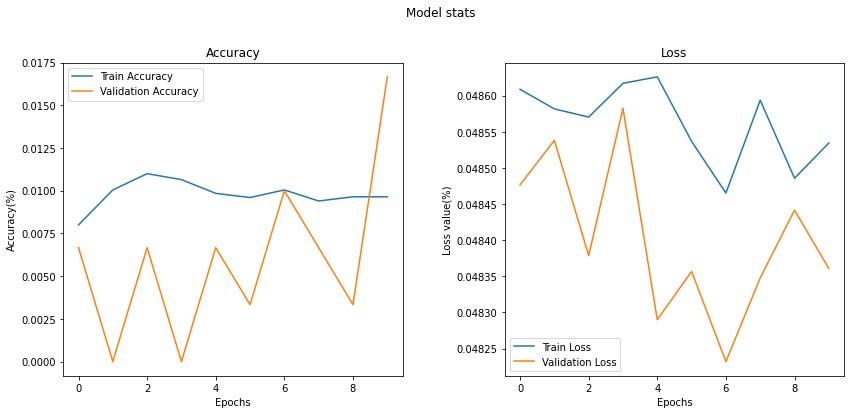

In [51]:
history2 = model0.fit(train_generator,validation_data=val_generator,validation_steps =6,epochs=10,steps_per_epoch=100)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history2.history['accuracy'],label='Train Accuracy')
ax1.plot(history2.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy(%)')
ax1.legend(loc='best')

ax2.plot(history2.history['loss'],label='Train Loss')
ax2.plot(history2.history['val_loss'],label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss value(%)')
ax2.legend(loc='best')

Re-extracting the images with a different size & using pre-process input

In [0]:
import cv2
x_train = []
label = []

for img,breeds in labels.values:
  train_feat = cv2.imread('./train/{}.jpg'.format(img),1)
  train_feat_resz = cv2.resize(train_feat,(256,256))
  x_train.append(train_feat_resz)
  label.append(breeds)

In [0]:
import numpy as np
x_train[0].shape
x_train = np.array(x_train)

In [18]:
x_train.shape

(10222, 256, 256, 3)

In [0]:
x_train_pre = preprocess_input(x_train)

In [20]:
print("x_train before pre-process==>",x_train[0])
print("x_train after pre-process==>",x_train_pre[0])

x_train before pre-process==> [[[ 29  77 137]
  [ 69 119 176]
  [ 50 102 151]
  ...
  [ 66 180 206]
  [ 67 149 180]
  [ 89 165 197]]

 [[ 70 113 167]
  [ 61 106 156]
  [ 52  99 144]
  ...
  [ 96 202 230]
  [ 80 168 199]
  [ 75 160 193]]

 [[ 46  84 130]
  [ 48  87 130]
  [ 87 128 167]
  ...
  [111 207 239]
  [ 92 189 222]
  [ 77 174 208]]

 ...

 [[ 68 121 188]
  [ 63 116 183]
  [ 69 121 187]
  ...
  [106 154 207]
  [119 170 223]
  [112 163 216]]

 [[ 67 120 187]
  [ 63 116 183]
  [ 70 122 188]
  ...
  [ 70 113 172]
  [102 155 209]
  [100 154 207]]

 [[ 62 115 182]
  [ 64 117 184]
  [ 72 123 189]
  ...
  [ 49  89 153]
  [ 77 133 187]
  [ 84 141 193]]]
x_train after pre-process==> [[[ 33.060997   -39.779      -94.68      ]
  [ 72.061        2.2210007  -54.68      ]
  [ 47.060997   -14.778999   -73.68      ]
  ...
  [102.061       63.221      -57.68      ]
  [ 76.061       32.221      -56.68      ]
  [ 93.061       48.221      -34.68      ]]

 [[ 63.060997    -3.7789993  -53.68      ]
  

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train_pre,ohe,test_size =0.2)

In [26]:
print("Shape of x_train is==>",x_train.shape)
print("Shape of x_val is==>",x_val.shape)
print("Shape of y_train is==>",y_train.shape)
print("Shape of y_val is==>",y_val.shape)

Shape of x_train is==> (8177, 256, 256, 3)
Shape of x_val is==> (2045, 256, 256, 3)
Shape of y_train is==> (8177, 120)
Shape of y_val is==> (2045, 120)


Epoch 1/10
64/64 [==============================] - 31s 481ms/step - loss: 4.0824 - accuracy: 0.1074 - val_loss: 3.5545 - val_accuracy: 0.2142
Epoch 2/10
64/64 [==============================] - 31s 481ms/step - loss: 3.6070 - accuracy: 0.1706 - val_loss: 3.0428 - val_accuracy: 0.2998
Epoch 3/10
64/64 [==============================] - 31s 481ms/step - loss: 3.1970 - accuracy: 0.2370 - val_loss: 2.6700 - val_accuracy: 0.3555
Epoch 4/10
64/64 [==============================] - 31s 481ms/step - loss: 2.8802 - accuracy: 0.2810 - val_loss: 2.3822 - val_accuracy: 0.4186
Epoch 5/10
64/64 [==============================] - 31s 481ms/step - loss: 2.6403 - accuracy: 0.3247 - val_loss: 2.2012 - val_accuracy: 0.4606
Epoch 6/10
64/64 [==============================] - 31s 481ms/step - loss: 2.4158 - accuracy: 0.3763 - val_loss: 2.0648 - val_accuracy: 0.4841
Epoch 7/10
64/64 [==============================] - 31s 481ms/step - loss: 2.2598 - accuracy: 0.3982 - val_loss: 1.9303 - val_accuracy: 0.4988

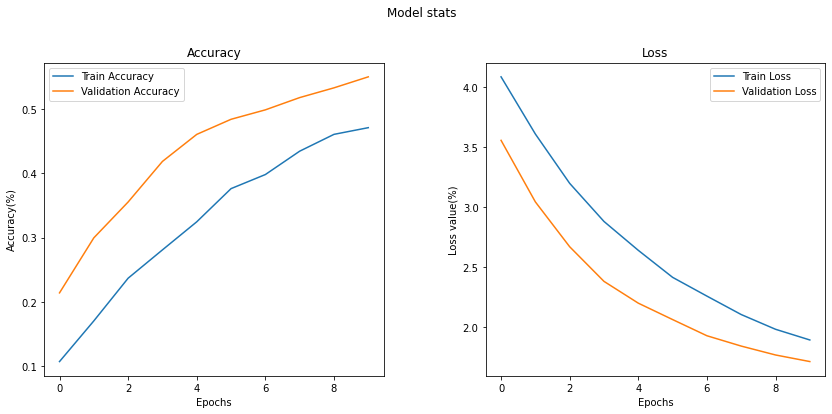

In [34]:
history1 = model0.fit(x_train,y_train,validation_data=(x_val,y_val),epochs = 10, batch_size = 128)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history1.history['accuracy'],label='Train Accuracy')
ax1.plot(history1.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy(%)')
ax1.legend(loc='best')

ax2.plot(history1.history['loss'],label='Train Loss')
ax2.plot(history1.history['val_loss'],label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss value(%)')
ax2.legend(loc='best')

Epoch 1/30
64/64 [==============================] - 31s 481ms/step - loss: 2.0158 - accuracy: 0.4542 - val_loss: 1.8556 - val_accuracy: 0.5022
Epoch 2/30
64/64 [==============================] - 31s 481ms/step - loss: 1.9111 - accuracy: 0.4791 - val_loss: 1.7742 - val_accuracy: 0.5154
Epoch 3/30
64/64 [==============================] - 31s 481ms/step - loss: 1.8241 - accuracy: 0.5063 - val_loss: 1.7260 - val_accuracy: 0.5296
Epoch 4/30
64/64 [==============================] - 31s 481ms/step - loss: 1.7457 - accuracy: 0.5222 - val_loss: 1.6823 - val_accuracy: 0.5301
Epoch 5/30
64/64 [==============================] - 31s 481ms/step - loss: 1.6501 - accuracy: 0.5392 - val_loss: 1.6427 - val_accuracy: 0.5487
Epoch 6/30
64/64 [==============================] - 31s 481ms/step - loss: 1.5723 - accuracy: 0.5651 - val_loss: 1.6190 - val_accuracy: 0.5482
Epoch 7/30
64/64 [==============================] - 31s 481ms/step - loss: 1.5301 - accuracy: 0.5733 - val_loss: 1.5765 - val_accuracy: 0.5511

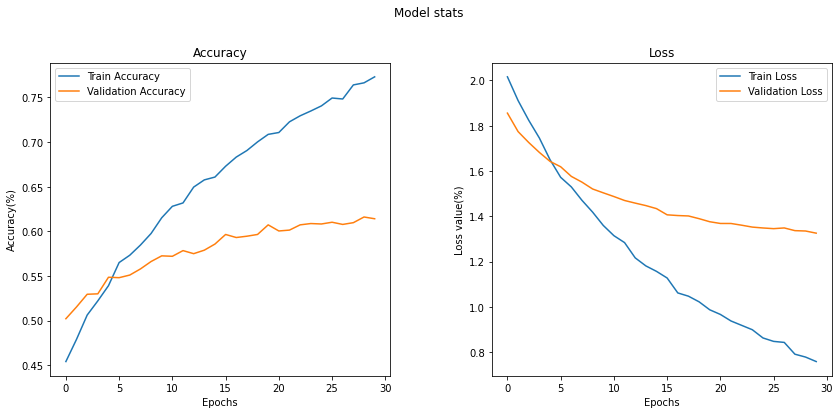

In [39]:
history1 = model0.fit(x_train,y_train,validation_data=(x_val,y_val),epochs = 30, batch_size = 128)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history1.history['accuracy'],label='Train Accuracy')
ax1.plot(history1.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy(%)')
ax1.legend(loc='best')

ax2.plot(history1.history['loss'],label='Train Loss')
ax2.plot(history1.history['val_loss'],label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss value(%)')
ax2.legend(loc='best')

Epoch 1/40
64/64 [==============================] - 31s 481ms/step - loss: 0.7397 - accuracy: 0.7802 - val_loss: 1.3256 - val_accuracy: 0.6210
Epoch 2/40
64/64 [==============================] - 31s 481ms/step - loss: 0.7392 - accuracy: 0.7780 - val_loss: 1.3235 - val_accuracy: 0.6215
Epoch 3/40
64/64 [==============================] - 31s 481ms/step - loss: 0.7034 - accuracy: 0.7943 - val_loss: 1.3214 - val_accuracy: 0.6088
Epoch 4/40
64/64 [==============================] - 31s 481ms/step - loss: 0.6951 - accuracy: 0.7878 - val_loss: 1.3230 - val_accuracy: 0.6088
Epoch 5/40
64/64 [==============================] - 31s 481ms/step - loss: 0.6842 - accuracy: 0.7971 - val_loss: 1.3174 - val_accuracy: 0.6230
Epoch 6/40
64/64 [==============================] - 31s 480ms/step - loss: 0.6587 - accuracy: 0.8023 - val_loss: 1.3197 - val_accuracy: 0.6161
Epoch 7/40
64/64 [==============================] - 31s 480ms/step - loss: 0.6444 - accuracy: 0.8097 - val_loss: 1.3218 - val_accuracy: 0.6147

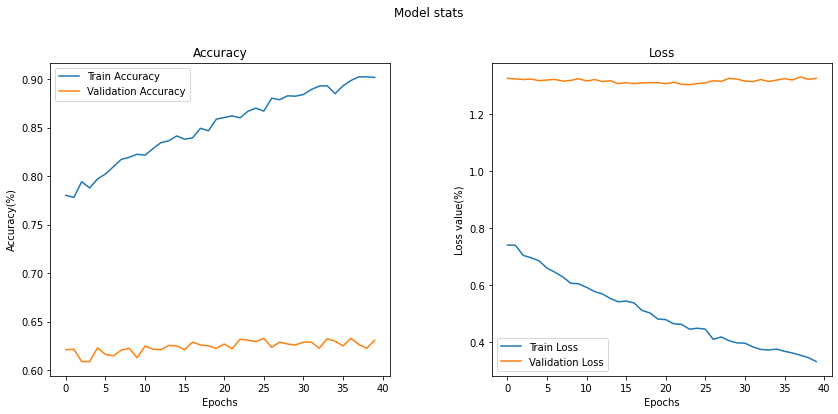

In [40]:
history1 = model0.fit(x_train,y_train,validation_data=(x_val,y_val),epochs = 40, batch_size = 128)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history1.history['accuracy'],label='Train Accuracy')
ax1.plot(history1.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy(%)')
ax1.legend(loc='best')

ax2.plot(history1.history['loss'],label='Train Loss')
ax2.plot(history1.history['val_loss'],label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss value(%)')
ax2.legend(loc='best')

Epoch 1/10
100/100 [==============================] - 86s 856ms/step - loss: 4.7479 - accuracy: 0.0156 - val_loss: 4.6505 - val_accuracy: 0.0399
Epoch 2/10
100/100 [==============================] - 84s 841ms/step - loss: 4.7031 - accuracy: 0.0193 - val_loss: 4.6209 - val_accuracy: 0.0498
Epoch 3/10
100/100 [==============================] - 84s 841ms/step - loss: 4.6817 - accuracy: 0.0254 - val_loss: 4.6006 - val_accuracy: 0.0534
Epoch 4/10
100/100 [==============================] - 84s 837ms/step - loss: 4.6747 - accuracy: 0.0315 - val_loss: 4.5876 - val_accuracy: 0.0520
Epoch 5/10
100/100 [==============================] - 85s 849ms/step - loss: 4.6464 - accuracy: 0.0297 - val_loss: 4.5598 - val_accuracy: 0.0717
Epoch 6/10
100/100 [==============================] - 83s 832ms/step - loss: 4.6288 - accuracy: 0.0364 - val_loss: 4.5426 - val_accuracy: 0.0633
Epoch 7/10
100/100 [==============================] - 84s 840ms/step - loss: 4.6013 - accuracy: 0.0325 - val_loss: 4.5263 - val_ac

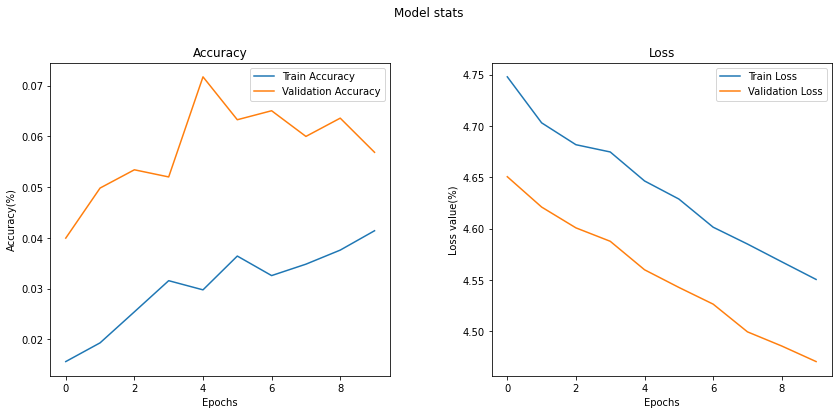

In [42]:
history1 = model0.fit(train_generator,validation_data=val_generator,epochs = 10,validation_steps = 128,steps_per_epoch=100)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history1.history['accuracy'],label='Train Accuracy')
ax1.plot(history1.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy(%)')
ax1.legend(loc='best')

ax2.plot(history1.history['loss'],label='Train Loss')
ax2.plot(history1.history['val_loss'],label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss value(%)')
ax2.legend(loc='best')

In [0]:
from tensorflow.keras.models import Model
x1 = base_model.output
x1 = Dense(1024,activation='relu')(x1)
x1 = Dropout(0.25)(x1)
x1 = Dense(256,activation='relu')(x1)
x1 = Dropout(0.25)(x1)
preds = Dense(120,activation='softmax')(x1)
model2 = Model(inputs = base_model.input,outputs=preds)

In [0]:
model2.compile(optimizer ='sgd',loss ='categorical_crossentropy',metrics=['accuracy'])

Epoch 1/10
64/64 [==============================] - 31s 482ms/step - loss: 5.2559 - accuracy: 0.0256 - val_loss: 4.4413 - val_accuracy: 0.0807
Epoch 2/10
64/64 [==============================] - 31s 481ms/step - loss: 4.4005 - accuracy: 0.0671 - val_loss: 3.9394 - val_accuracy: 0.1575
Epoch 3/10
64/64 [==============================] - 31s 480ms/step - loss: 3.9305 - accuracy: 0.1313 - val_loss: 3.4035 - val_accuracy: 0.2450
Epoch 4/10
64/64 [==============================] - 31s 480ms/step - loss: 3.4971 - accuracy: 0.1898 - val_loss: 2.9468 - val_accuracy: 0.3222
Epoch 5/10
64/64 [==============================] - 31s 480ms/step - loss: 3.1211 - accuracy: 0.2552 - val_loss: 2.6011 - val_accuracy: 0.3961
Epoch 6/10
64/64 [==============================] - 31s 480ms/step - loss: 2.7851 - accuracy: 0.2997 - val_loss: 2.3323 - val_accuracy: 0.4269
Epoch 7/10
64/64 [==============================] - 31s 480ms/step - loss: 2.5650 - accuracy: 0.3433 - val_loss: 2.1552 - val_accuracy: 0.4650

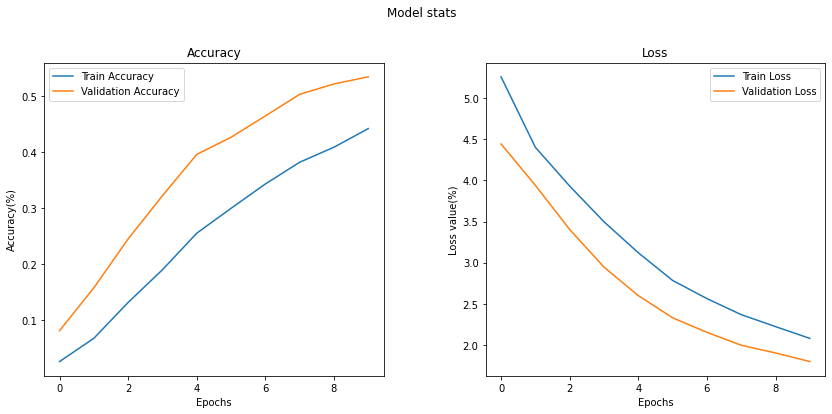

In [37]:
history1 = model2.fit(x_train,y_train,validation_data=(x_val,y_val),epochs = 10, batch_size = 128)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history1.history['accuracy'],label='Train Accuracy')
ax1.plot(history1.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy(%)')
ax1.legend(loc='best')

ax2.plot(history1.history['loss'],label='Train Loss')
ax2.plot(history1.history['val_loss'],label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss value(%)')
ax2.legend(loc='best')

Epoch 1/30
64/64 [==============================] - 31s 481ms/step - loss: 1.9649 - accuracy: 0.4702 - val_loss: 1.7127 - val_accuracy: 0.5560
Epoch 2/30
64/64 [==============================] - 31s 481ms/step - loss: 1.8311 - accuracy: 0.4919 - val_loss: 1.6572 - val_accuracy: 0.5579
Epoch 3/30
64/64 [==============================] - 31s 480ms/step - loss: 1.7343 - accuracy: 0.5167 - val_loss: 1.6201 - val_accuracy: 0.5628
Epoch 4/30
64/64 [==============================] - 31s 480ms/step - loss: 1.6669 - accuracy: 0.5342 - val_loss: 1.5902 - val_accuracy: 0.5672
Epoch 5/30
64/64 [==============================] - 31s 480ms/step - loss: 1.5982 - accuracy: 0.5487 - val_loss: 1.5361 - val_accuracy: 0.5780
Epoch 6/30
64/64 [==============================] - 31s 480ms/step - loss: 1.5355 - accuracy: 0.5643 - val_loss: 1.5080 - val_accuracy: 0.5892
Epoch 7/30
64/64 [==============================] - 31s 480ms/step - loss: 1.4575 - accuracy: 0.5840 - val_loss: 1.4933 - val_accuracy: 0.5951

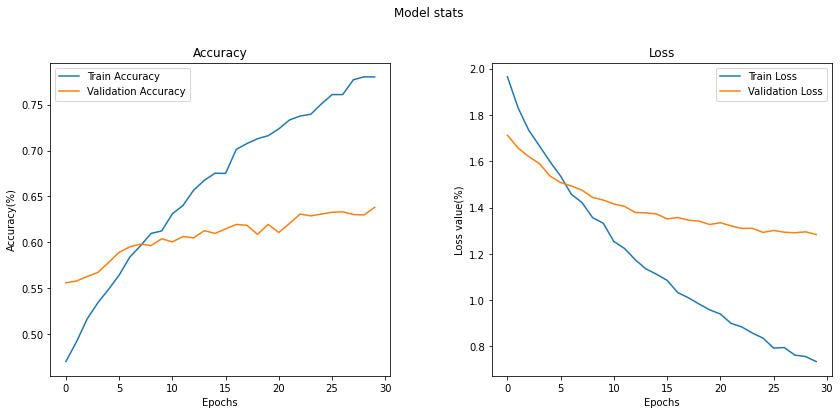

In [41]:
history1 = model2.fit(x_train,y_train,validation_data=(x_val,y_val),epochs = 30, batch_size = 128)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history1.history['accuracy'],label='Train Accuracy')
ax1.plot(history1.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy value')
ax1.legend(loc='best')

ax2.plot(history1.history['loss'],label='Train Loss')
ax2.plot(history1.history['val_loss'],label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss value')
ax2.legend(loc='best')

Epoch 1/20
64/64 [==============================] - 31s 482ms/step - loss: 0.6944 - accuracy: 0.7954 - val_loss: 1.2910 - val_accuracy: 0.6352
Epoch 2/20
64/64 [==============================] - 31s 481ms/step - loss: 0.7040 - accuracy: 0.7906 - val_loss: 1.2792 - val_accuracy: 0.6377
Epoch 3/20
64/64 [==============================] - 31s 481ms/step - loss: 0.6920 - accuracy: 0.7956 - val_loss: 1.2812 - val_accuracy: 0.6425
Epoch 4/20
64/64 [==============================] - 31s 480ms/step - loss: 0.6681 - accuracy: 0.7974 - val_loss: 1.2840 - val_accuracy: 0.6435
Epoch 5/20
64/64 [==============================] - 31s 481ms/step - loss: 0.6403 - accuracy: 0.8097 - val_loss: 1.2753 - val_accuracy: 0.6367
Epoch 6/20
64/64 [==============================] - 31s 481ms/step - loss: 0.6464 - accuracy: 0.8060 - val_loss: 1.2731 - val_accuracy: 0.6391
Epoch 7/20
64/64 [==============================] - 31s 481ms/step - loss: 0.6248 - accuracy: 0.8140 - val_loss: 1.2825 - val_accuracy: 0.6342

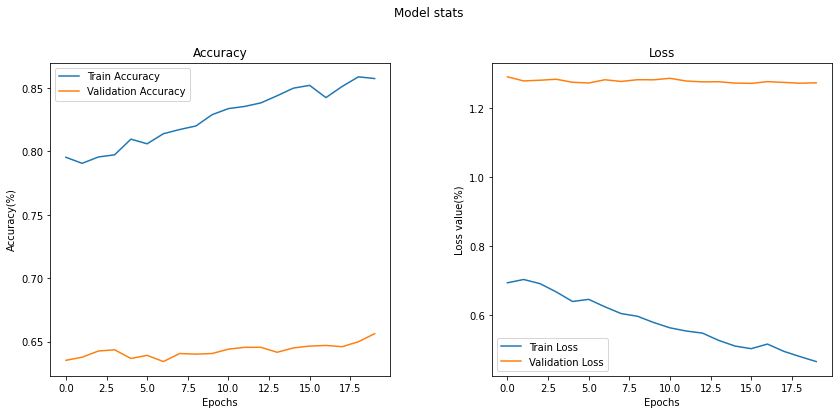

In [42]:
history1 = model2.fit(x_train,y_train,validation_data=(x_val,y_val),epochs = 20, batch_size = 128)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history1.history['accuracy'],label='Train Accuracy')
ax1.plot(history1.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy(%)')
ax1.legend(loc='best')

ax2.plot(history1.history['loss'],label='Train Loss')
ax2.plot(history1.history['val_loss'],label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss value(%)')
ax2.legend(loc='best')

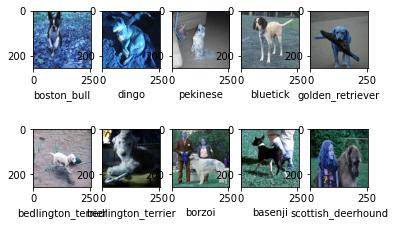

In [21]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(label[i])
  i += 1

Since the train images has images with humans as well with them which is kind of being in the way to classify better so image segmentation method could help in clearing images & getting a better accuracy.